In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('earthquake_dataset.csv');

In [3]:
data.head()

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
0,11,6,2024,19,12,2.9,9.34,125.58,7,647,9,8607,0
1,10,6,2024,2318,16,4.3,4.43,127.12,216,1234,117,8015,2
2,10,6,2024,2317,29,2.0,11.03,124.55,14,926,97,6540,0
3,10,6,2024,2250,1,3.1,10.52,125.06,12,1261,173,6607,1
4,10,6,2024,2242,68,3.9,5.74,126.45,92,664,59,8014,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85009 entries, 0 to 85008
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Day               85009 non-null  int64  
 1   Month             85009 non-null  int64  
 2   Year              85009 non-null  int64  
 3   Time              85009 non-null  int64  
 4   Depth(km)         85009 non-null  int64  
 5   Magnitude         85009 non-null  float64
 6   Latitude          85009 non-null  float64
 7   Longitude         85009 non-null  float64
 8   Distance(km)      85009 non-null  int64  
 9   City              85009 non-null  int64  
 10  Province          85009 non-null  int64  
 11  Zip Code          85009 non-null  int64  
 12  Richter Category  85009 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 8.4 MB


We seem to have  object datatypes we need to convert this to their actual expected datatypes

In [5]:
data.shape

(85009, 13)

In [6]:
data.dtypes

Day                   int64
Month                 int64
Year                  int64
Time                  int64
Depth(km)             int64
Magnitude           float64
Latitude            float64
Longitude           float64
Distance(km)          int64
City                  int64
Province              int64
Zip Code              int64
Richter Category      int64
dtype: object

In [7]:
data.isnull().sum()

Day                 0
Month               0
Year                0
Time                0
Depth(km)           0
Magnitude           0
Latitude            0
Longitude           0
Distance(km)        0
City                0
Province            0
Zip Code            0
Richter Category    0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_features = ['City', 'Province']
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
data.dtypes

Day                   int64
Month                 int64
Year                  int64
Time                  int64
Depth(km)             int64
Magnitude           float64
Latitude            float64
Longitude           float64
Distance(km)          int64
City                  int64
Province              int64
Zip Code              int64
Richter Category      int64
dtype: object

In [9]:
data.head()

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
0,11,6,2024,19,12,2.9,9.34,125.58,7,647,9,8607,0
1,10,6,2024,2318,16,4.3,4.43,127.12,216,1234,117,8015,2
2,10,6,2024,2317,29,2.0,11.03,124.55,14,926,97,6540,0
3,10,6,2024,2250,1,3.1,10.52,125.06,12,1261,173,6607,1
4,10,6,2024,2242,68,3.9,5.74,126.45,92,664,59,8014,1


In [10]:
data.describe()

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
count,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.000000,85009.00000,85009.000000
mean,15.522721,6.495383,2021.171217,1122.734252,30.574692,2.552880,10.896548,123.997866,36.772777,711.228740,103.500135,5653.45234,0.290663
std,8.755703,3.580135,1.806742,775.162512,38.783289,0.694044,4.107527,2.620072,48.267005,369.973025,61.030410,2783.27892,0.565440
min,1.000000,1.000000,2018.000000,0.000000,0.000000,1.000000,1.780000,10.560000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,8.000000,3.000000,2020.000000,401.000000,9.000000,2.100000,7.700000,121.150000,10.000000,409.000000,56.000000,3205.00000,0.000000
50%,15.000000,6.000000,2021.000000,1046.000000,21.000000,2.400000,9.860000,124.950000,19.000000,651.000000,88.000000,6113.00000,0.000000
75%,23.000000,10.000000,2023.000000,1902.000000,33.000000,2.900000,13.870000,126.260000,44.000000,1000.000000,179.000000,8306.00000,0.000000
max,31.000000,12.000000,2024.000000,2359.000000,1068.000000,7.500000,23.800000,163.630000,779.000000,1592.000000,200.000000,9811.00000,5.000000


In [11]:
data['Richter Category'] = 0
data.head()

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
0,11,6,2024,19,12,2.9,9.34,125.58,7,647,9,8607,0
1,10,6,2024,2318,16,4.3,4.43,127.12,216,1234,117,8015,0
2,10,6,2024,2317,29,2.0,11.03,124.55,14,926,97,6540,0
3,10,6,2024,2250,1,3.1,10.52,125.06,12,1261,173,6607,0
4,10,6,2024,2242,68,3.9,5.74,126.45,92,664,59,8014,0


In [12]:
def getRichter(magnitude):
    if (magnitude <= 2.9):
        return 0
    elif (magnitude <= 3.9):
        return 1
    elif (magnitude <= 4.9):
        return 2
    elif (magnitude <= 5.9):
        return 3
    elif (magnitude <= 6.9):
        return 4
    elif (magnitude <= 7.9):
        return 5
    else:
        return 6

In [13]:
for index, row in data.iterrows():
    data.loc[index, 'Richter Category'] = getRichter(row['Magnitude'])
data.head()

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
0,11,6,2024,19,12,2.9,9.34,125.58,7,647,9,8607,0
1,10,6,2024,2318,16,4.3,4.43,127.12,216,1234,117,8015,2
2,10,6,2024,2317,29,2.0,11.03,124.55,14,926,97,6540,0
3,10,6,2024,2250,1,3.1,10.52,125.06,12,1261,173,6607,1
4,10,6,2024,2242,68,3.9,5.74,126.45,92,664,59,8014,1


In [14]:
data.shape

(85009, 13)

In [15]:
data.shape

(85009, 13)

In [16]:
data[data['Zip Code'] == 0]

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
16,10,6,2024,1937,17,2.3,9.13,126.22,8,82,180,0,0
131,8,6,2024,1339,90,2.2,9.07,126.23,6,82,180,0,0
180,7,6,2024,722,52,2.5,11.28,125.39,16,565,71,0,0
367,3,6,2024,2242,28,2.4,6.36,124.67,8,1225,171,0,0
487,1,6,2024,1616,32,2.4,11.63,125.17,14,609,156,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84970,5,1,2018,837,71,3.5,3.07,125.17,264,1233,59,0,1
84976,4,1,2018,815,10,3.8,3.36,126.61,262,1233,59,0,1
84977,4,1,2018,641,139,4.1,3.59,126.45,231,1233,59,0,2
84983,3,1,2018,1739,96,3.8,4.15,126.76,202,1233,59,0,1


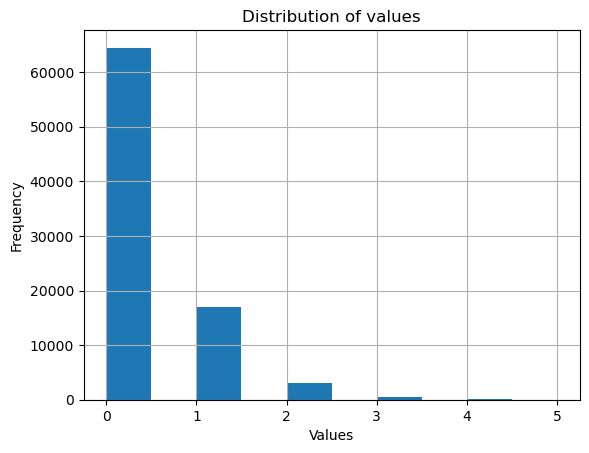

In [18]:
import matplotlib.pyplot as plt

data['Richter Category'].hist()  # Adjust bins as needed for better visualization
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

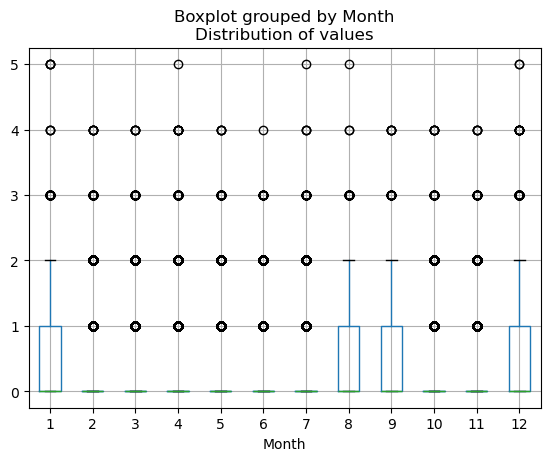

In [19]:
data.boxplot(column='Richter Category', by='Month')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In [20]:
X = data.drop(['Richter Category', 'Magnitude', 'Depth(km)', 'City', 'Province', 'Distance(km)'], axis=1)
y = data['Richter Category']

In [21]:
X.columns

Index(['Day', 'Month', 'Year', 'Time', 'Latitude', 'Longitude', 'Zip Code'], dtype='object')

In [22]:
X.shape

(85009, 7)

In [23]:
y.shape

(85009,)

In [24]:
X.head()

,Day,Month,Year,Time,Latitude,Longitude,Zip Code
0,11,6,2024,19,9.34,125.58,8607
1,10,6,2024,2318,4.43,127.12,8015
2,10,6,2024,2317,11.03,124.55,6540
3,10,6,2024,2250,10.52,125.06,6607
4,10,6,2024,2242,5.74,126.45,8014


In [25]:
y.head()

0    0
1    2
2    0
3    1
4    1
Name: Richter Category, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [27]:
X_train.shape, y_train.shape  #display X_train and y_train shape

((59506, 7), (59506,))

In [28]:
X_test.shape, y_test.shape  #display X_test and y_test shape

((25503, 7), (25503,))

In [29]:
X_train.head()

,Day,Month,Year,Time,Latitude,Longitude,Zip Code
42080,9,10,2021,139,12.79,120.63,5104
50636,9,2,2021,1139,9.34,125.71,2707
54742,29,9,2020,2029,15.58,120.51,2306
2412,23,4,2024,542,8.55,126.52,8310
40810,18,11,2021,336,7.80,126.09,8805


In [30]:
X_test.head()

,Day,Month,Year,Time,Latitude,Longitude,Zip Code
8750,28,12,2023,628,13.90,120.44,4215
33113,12,7,2022,1508,10.48,126.13,2410
82320,29,6,2018,2342,13.98,120.53,4216
47296,6,6,2021,651,5.55,125.11,9517
32289,28,7,2022,1027,17.42,120.97,2816


In [31]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [32]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [33]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test) 

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [34]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [35]:
#import libraries to build the random forest model and fit in the train data
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)  

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [36]:
#import libraries for SVM
#from sklearn.svm import SVC

#svm_classifier = SVC(C=100,kernel='rbf',gamma=1)     
#svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
#y_pred_svm = svm_classifier.predict(X_test)

#get the accuracy score
#acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [37]:
#import libraries for SVM
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()     
ada_boost.fit(X_train,y_train)

#make predictions and store data for later
y_pred_ada = ada_boost.predict(X_test)

#get the accuracy score
acc_ada = round(accuracy_score(y_test,y_pred_ada)*100,2)

In [38]:
#import libraries for SVM
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()     
bg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_bg = bg.predict(X_test)

#get the accuracy score
acc_bg = round(accuracy_score(y_test,y_pred_bg)*100,2)

In [39]:
#import libraries for SVM
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()     
etc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_etc = etc.predict(X_test)

#get the accuracy score
acc_etc = round(accuracy_score(y_test,y_pred_etc)*100,2)

In [40]:
#import libraries for SVM
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()     
hgb.fit(X_train,y_train)

#make predictions and store data for later
y_pred_hgb = hgb.predict(X_test)

#get the accuracy score
acc_hgb = round(accuracy_score(y_test,y_pred_hgb)*100,2)

In [41]:
#import libraries for SVM
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()     
mlpc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_mlpc = mlpc.predict(X_test)

#get the accuracy score
acc_mlpc = round(accuracy_score(y_test,y_pred_mlpc)*100,2)

In [42]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() 
bnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_bnb = bnb.predict(X_test)  

#get the accuracy score
acc_bnb = round(accuracy_score(y_test,y_pred_bnb)*100,2)

In [43]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier() 
ext.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_ext = ext.predict(X_test)  

#get the accuracy score
acc_ext = round(accuracy_score(y_test,y_pred_ext)*100,2)

In [44]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dc = dc.predict(X_test)  

#get the accuracy score
acc_dc = round(accuracy_score(y_test,y_pred_dc)*100,2)

In [45]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes', 'Ada Boost', 
              'Bagging Classifier', 'Extra Trees', 'Hist Gradient Boosting',
              'MLPC Classifier', 'Bernoulli NB', 'Extra Tree Classifier', 'Dummy Classifier'],
    'Score': [acc_gb, acc_dt, acc_knn, 
              acc_rf, acc_gnb, acc_ada, acc_bg, acc_etc, acc_hgb, acc_mlpc, acc_bnb, acc_ext, acc_dc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
77.85,Random Forest
77.56,Gradient Boosting
77.25,Hist Gradient Boosting
77.14,Extra Trees
76.21,Bagging Classifier
75.61,Naive Bayes
75.59,Bernoulli NB
75.59,Dummy Classifier
75.03,MLPC Classifier


In [46]:
#import libraries for root-mean-square error
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

#display the root-mean-square error
MSE=np.square(np.subtract(y_test,y_pred_rf)).mean()
RMSE = (math.sqrt(MSE)) 
print(RMSE)

0.5776218675907189


In [47]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf) 

print ("Confusion Matrix : \n", cm)  #display confusion matrix of multi class classification

Confusion Matrix : 
 [[18468   783    19     7     0     0]
 [ 3809  1239    78     5     0     0]
 [  526   247   142     3     0     0]
 [   87    51    11     5     0     0]
 [   14     1     3     1     0     0]
 [    2     2     0     0     0     0]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

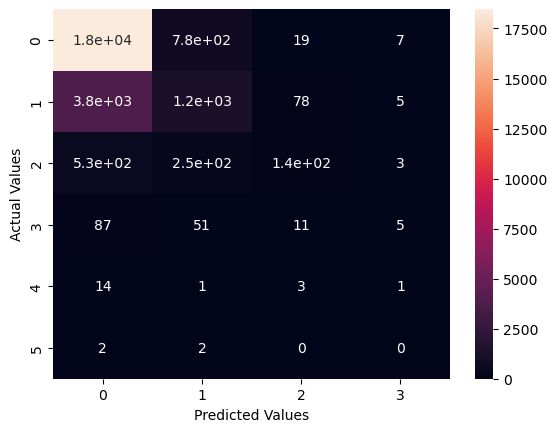

In [48]:
import seaborn as sns  #import package for plotting

#confusion matrix
cm = pd.crosstab(y_test, y_pred_rf, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)

In [49]:
y_test

8750     0
33113    2
82320    0
47296    0
32289    0
        ..
33009    1
19463    0
83043    0
83250    0
70440    0
Name: Richter Category, Length: 25503, dtype: int64

In [50]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
accuracy_score(y_test, y_pred_rf)

0.7784966474532408

In [52]:
precision_score(y_test, y_pred_rf, average='weighted')

C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.738372002027484

In [53]:
recall_score(y_test, y_pred_rf, average='weighted')

0.7784966474532408

In [54]:
f1_score(y_test, y_pred_rf, average='weighted')

0.7378106208890097

In [59]:
from sklearn.metrics import classification_report

# Assuming you already have:
# - Trained Random Forest model (rf_model)
# - True labels for test data (y_true)
# - Predicted labels from the model (y_pred)
# - Class names (target_names) - optional for more readable report

# Generate classification report
report = classification_report(y_test, y_pred_rf, target_names=["Micro", "Minor", "Light", "Moderate", "Strong", "Major"])

# Print the report
print(report)

              precision    recall  f1-score   support

       Micro       0.81      0.96      0.88     19277
       Minor       0.53      0.24      0.33      5131
       Light       0.56      0.15      0.24       918
    Moderate       0.24      0.03      0.06       154
      Strong       0.00      0.00      0.00        19
       Major       0.00      0.00      0.00         4

    accuracy                           0.78     25503
   macro avg       0.36      0.23      0.25     25503
weighted avg       0.74      0.78      0.74     25503



C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from sklearn.metrics import confusion_matrix

# Assuming you already have:
# - Trained Random Forest model (rf_model)
# - True labels for test data (y_true)
# - Predicted labels from the model (y_pred)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Calculate total number of samples per class
n_samples_per_class = cm.sum(axis=0)  # Sum by columns

# Calculate per-class accuracy
class_accuracies = np.diagonal(cm) / n_samples_per_class

# Print class accuracies (optionalt
target_names = ["Micro", "Minor", "Light", "Moderate", "Strong", "Major"]
print("PER-CLASS ACCURACY")
for key, item in enumerate(target_names):
    print(item + ": " + str(class_accuracies[key]))

PER-CLASS ACCURACY
Micro: 0.806251637125644
Minor: 0.5333620318553595
Light: 0.5612648221343873
Moderate: 0.23809523809523808
Strong: nan
Major: nan


C:\Users\windows 11\AppData\Local\Temp\ipykernel_19828\3064619826.py:15: RuntimeWarning: invalid value encountered in divide
  class_accuracies = np.diagonal(cm) / n_samples_per_class


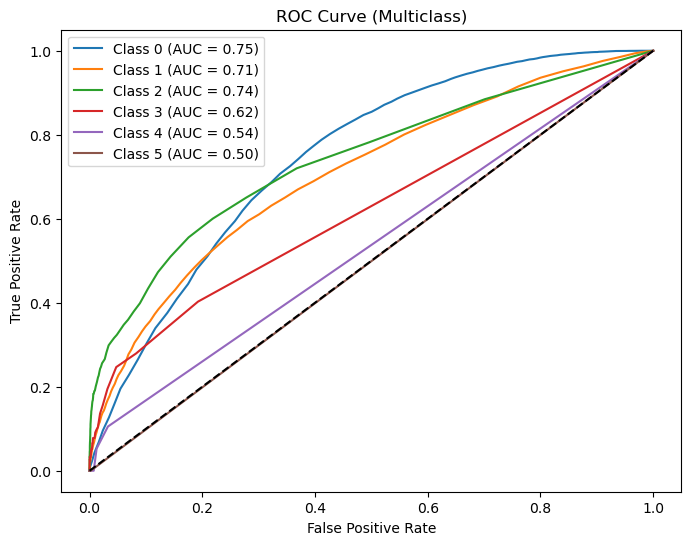

In [64]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Make predictions on test set
probs = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf.classes_[i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(rf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {rf.classes_[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()

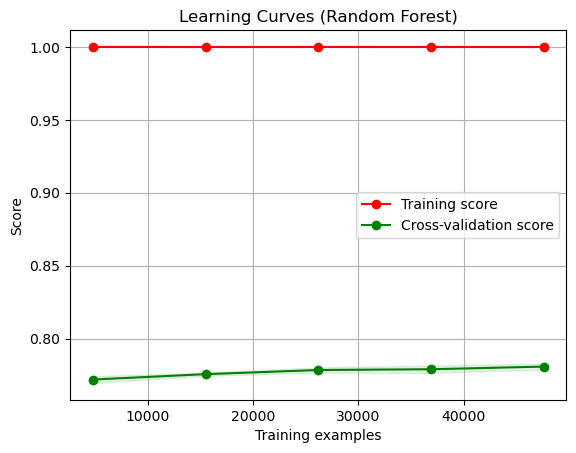

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(rf, title, X_train, y_train, cv=5)
plt.show()

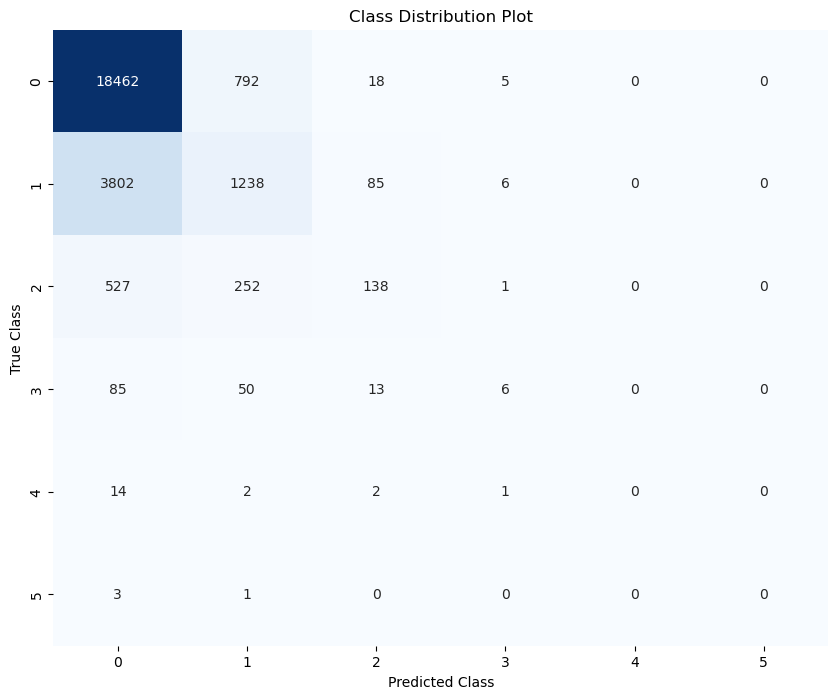

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot Class Distribution Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Class Distribution Plot')
plt.show()

In [59]:
data.head()

,Day,Month,Year,Time,Depth(km),Magnitude,Latitude,Longitude,Distance(km),City,Province,Zip Code,Richter Category
0,11,6,2024,19,12,2.9,9.34,125.58,7,647,9,8607,0
1,10,6,2024,2318,16,4.3,4.43,127.12,216,1234,117,8015,2
2,10,6,2024,2317,29,2.0,11.03,124.55,14,926,97,6540,0
3,10,6,2024,2250,1,3.1,10.52,125.06,12,1261,173,6607,1
4,10,6,2024,2242,68,3.9,5.74,126.45,92,664,59,8014,1


In [66]:
data.to_csv('earthquake_dataset.csv', index=False);

In [63]:
X.columns

Index(['Day', 'Month', 'Year', 'Time', 'Latitude', 'Longitude', 'Zip Code'], dtype='object')

In [71]:
to_pred = pd.DataFrame(data=[[10, 6, 2024, 2318, 4.43, 127.12, 8015]], columns=['Day', 'Month', 'Year', 'Time', 'Latitude', 'Longitude', 'Zip Code'])
rf.predict(to_pred)

array([1], dtype=int64)